## Análise de Convergência dos estados brasileiros considerando indicadores utilizados pelo Eurofound

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
import csv
import json

In [2]:
!pip install --upgrade matplotlib --quiet

In [3]:
!pip install --upgrade seaborn --quiet

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import seaborn as sns

# Indicadores relacionados ao Índice de Desenvolvimento Humano

### PNAD Contínua

In [8]:
arquivo = "ADH_BASE_RADAR_2012-2021.xlsx"

caminho_completo = os.path.abspath(arquivo)
print("O caminho completo para o arquivo é:", caminho_completo)

O caminho completo para o arquivo é: D:\docs_mariana\ProjetosGit\Convergencia\ADH_BASE_RADAR_2012-2021.xlsx


In [9]:
df_mul_siafi_ibge = pd.read_excel('D:\docs_mariana\ProjetosGit\Convergencia\ADH_BASE_RADAR_2012-2021.xlsx')

In [10]:
df_mul_siafi_ibge.head(11)

,ANO,AGREGACAO,CODIGO,NOME,IDHM,IDHM_L,IDHM_E,IDHM_R,I_ESCOLARIDADE,I_FREQ_PROP,...,POP6A17,POP11A13,POP15A17,POP15M,POP18A20,POP18A24,POP18M,POP25M,POP65M,POPOCUP18M
0,2012,BRASIL,NaN,NaN,0.746,0.825,0.687,0.732,0.606,0.731,...,39808859,10304212,10609288,150994845,10076087,23924348,140385557,116461209,15249133,84277753
1,2013,BRASIL,NaN,NaN,0.753,0.830,0.698,0.737,0.615,0.744,...,39055262,9986737,10521249,153338252,10336071,24034903,142817003,118782100,15820311,86108710
2,2014,BRASIL,NaN,NaN,0.762,0.835,0.715,0.741,0.630,0.761,...,38765780,9687655,10446675,155356978,10224771,23840076,144910303,121070227,16425141,87308460
3,2015,BRASIL,NaN,NaN,0.765,0.840,0.724,0.736,0.642,0.769,...,38189476,9314133,10401307,157576293,10394554,23851445,147174986,123323541,17060247,87756538
4,2016,BRASIL,NaN,NaN,0.771,0.845,0.740,0.734,0.657,0.786,...,37694949,9288033,10375148,159692542,10242815,23779687,149317393,125537706,17728449,87110394
5,2017,BRASIL,NaN,NaN,0.774,0.849,0.742,0.735,0.655,0.789,...,36965134,9178387,9987551,161671766,10306849,23975663,151684215,127708552,18431296,87616245
6,2018,BRASIL,NaN,NaN,0.780,0.854,0.749,0.741,0.662,0.797,...,36460225,9041166,9641591,163492349,10093878,23998725,153850757,129852032,19168661,89281706
7,2019,BRASIL,NaN,NaN,0.785,0.858,0.760,0.743,0.674,0.807,...,35999274,8951264,9389698,165329825,10194743,23952392,155940127,131987735,19941230,91579200
8,2020,BRASIL,NaN,NaN,0.784,0.854,0.768,0.736,0.695,0.807,...,35750038,8751715,9357153,167005197,9806225,23521448,157648044,134126596,20748553,83946549
9,2021,BRASIL,NaN,NaN,0.766,0.819,0.757,0.724,0.703,0.785,...,35708677,8708856,9273169,168679921,9546945,23143737,159406751,136263014,21590309,86645408


In [11]:
df_mul_siafi_ibge.columns

Index(['ANO', 'AGREGACAO', 'CODIGO', 'NOME', 'IDHM', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'GINI',
       'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'P

## Fazendo análise do resultado dos indicadores:
### - IDHM: Índice de Desenvolvimento Humano Municipal;
### - ESPVIDA: Esperança de vida ao nascer (IDH);
### - ANOSEST: Média de anos de estudo (IDH).


In [12]:
df_dim_soc_idh = df_mul_siafi_ibge.drop(columns=['IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'GINI',
       'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'POP18A20', 'POP18A24', 'POP18M', 'POP25M', 'POP65M',
       'POPOCUP18M'])

In [13]:
df_dim_soc_idh.head()

,ANO,AGREGACAO,CODIGO,NOME,IDHM,ESPVIDA,ANOSEST
0,2012,BRASIL,NaN,NaN,0.746,74.48,8.56
1,2013,BRASIL,NaN,NaN,0.753,74.80,8.69
2,2014,BRASIL,NaN,NaN,0.762,75.11,8.88
3,2015,BRASIL,NaN,NaN,0.765,75.40,9.03
4,2016,BRASIL,NaN,NaN,0.771,75.68,9.13


In [14]:
df_dim_soc_idh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ANO        490 non-null    int64  
 1   AGREGACAO  490 non-null    object 
 2   CODIGO     480 non-null    float64
 3   NOME       480 non-null    object 
 4   IDHM       490 non-null    float64
 5   ESPVIDA    490 non-null    float64
 6   ANOSEST    490 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 26.9+ KB


In [15]:
df_dim_soc_idh['ANO'] = pd.to_datetime(df_dim_soc_idh['ANO'], format='%Y')

In [16]:
df_dim_soc_idh.head()

,ANO,AGREGACAO,CODIGO,NOME,IDHM,ESPVIDA,ANOSEST
0,2012-01-01,BRASIL,NaN,NaN,0.746,74.48,8.56
1,2013-01-01,BRASIL,NaN,NaN,0.753,74.80,8.69
2,2014-01-01,BRASIL,NaN,NaN,0.762,75.11,8.88
3,2015-01-01,BRASIL,NaN,NaN,0.765,75.40,9.03
4,2016-01-01,BRASIL,NaN,NaN,0.771,75.68,9.13


In [17]:
df_dim_soc_idh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ANO        490 non-null    datetime64[ns]
 1   AGREGACAO  490 non-null    object        
 2   CODIGO     480 non-null    float64       
 3   NOME       480 non-null    object        
 4   IDHM       490 non-null    float64       
 5   ESPVIDA    490 non-null    float64       
 6   ANOSEST    490 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 26.9+ KB


In [18]:
import pandas as pd

# Extrair o ano da coluna "Referência"
df_dim_soc_idh['Ano'] = df_dim_soc_idh['ANO'].dt.year



In [19]:
df_dim_soc_idh.head()

,ANO,AGREGACAO,CODIGO,NOME,IDHM,ESPVIDA,ANOSEST,Ano
0,2012-01-01,BRASIL,NaN,NaN,0.746,74.48,8.56,2012
1,2013-01-01,BRASIL,NaN,NaN,0.753,74.80,8.69,2013
2,2014-01-01,BRASIL,NaN,NaN,0.762,75.11,8.88,2014
3,2015-01-01,BRASIL,NaN,NaN,0.765,75.40,9.03,2015
4,2016-01-01,BRASIL,NaN,NaN,0.771,75.68,9.13,2016


In [20]:
df_dim_soc_idh.columns

Index(['ANO', 'AGREGACAO', 'CODIGO', 'NOME', 'IDHM', 'ESPVIDA', 'ANOSEST',
       'Ano'],
      dtype='object')

In [29]:
df_dim_soc_idh_BR = df_dim_soc_idh.drop(columns=['ANO', 'CODIGO', 'NOME'])

In [30]:
df_dim_soc_idh_BR.head()

,AGREGACAO,IDHM,ESPVIDA,ANOSEST,Ano
0,BRASIL,0.746,74.48,8.56,2012
1,BRASIL,0.753,74.80,8.69,2013
2,BRASIL,0.762,75.11,8.88,2014
3,BRASIL,0.765,75.40,9.03,2015
4,BRASIL,0.771,75.68,9.13,2016


In [31]:
df_dim_soc_idh_BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGREGACAO  490 non-null    object 
 1   IDHM       490 non-null    float64
 2   ESPVIDA    490 non-null    float64
 3   ANOSEST    490 non-null    float64
 4   Ano        490 non-null    int32  
dtypes: float64(3), int32(1), object(1)
memory usage: 17.4+ KB


In [32]:
# Filtrar linhas onde a coluna 'coluna' contenha 'RM_RIDE'
df_dim_soc_idh_BR = df_dim_soc_idh_BR[~df_dim_soc_idh_BR['AGREGACAO'].str.contains('RM_RIDE')]


In [33]:
df_dim_soc_idh_BR.tail()

,AGREGACAO,IDHM,ESPVIDA,ANOSEST,Ano
275,UF,0.771,72.84,10.35,2021
276,UF,0.742,70.03,9.94,2021
277,UF,0.736,68.77,9.83,2021
278,UF,0.737,68.28,9.85,2021
279,UF,0.814,73.16,12.20,2021


In [34]:
# Filtrar linhas onde a coluna 'coluna' contenha 'RM_RIDE'
df_dim_soc_idh_BR = df_dim_soc_idh_BR[~df_dim_soc_idh_BR['AGREGACAO'].str.contains('UF')]

In [35]:
df_dim_soc_idh_BR.tail()

,AGREGACAO,IDHM,ESPVIDA,ANOSEST,Ano
5,BRASIL,0.774,75.96,9.26,2017
6,BRASIL,0.780,76.22,9.45,2018
7,BRASIL,0.785,76.47,9.55,2019
8,BRASIL,0.784,76.21,9.82,2020
9,BRASIL,0.766,74.16,9.91,2021


In [36]:
df_dim_soc_idh_BR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGREGACAO  10 non-null     object 
 1   IDHM       10 non-null     float64
 2   ESPVIDA    10 non-null     float64
 3   ANOSEST    10 non-null     float64
 4   Ano        10 non-null     int32  
dtypes: float64(3), int32(1), object(1)
memory usage: 440.0+ bytes


## Gráficos do indicador - Índice de Desenvolvimento Humano (IDH)

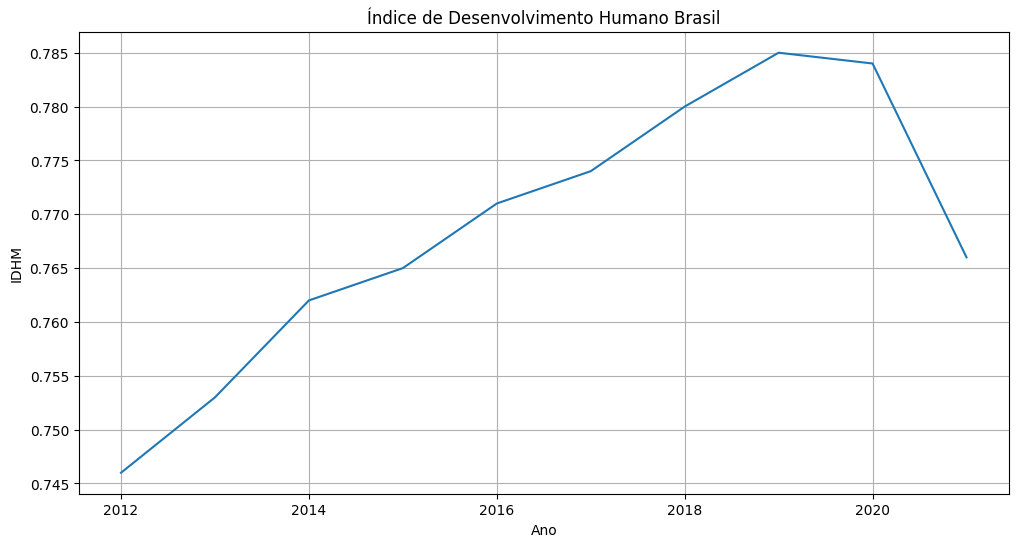

In [43]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

plt.plot(df_dim_soc_idh_BR['Ano'], df_dim_soc_idh_BR['IDHM'])

# Adicionando título e rótulos aos eixos
plt.title('Índice de Desenvolvimento Humano Brasil')
plt.xlabel('Ano')
plt.ylabel('IDHM')
plt.grid(True)

plt.show()

## Gráficos do indicador - Esperança de vida ao nascer (IDH)

In [44]:
df_dim_soc_idh_BR.head()

,AGREGACAO,IDHM,ESPVIDA,ANOSEST,Ano
0,BRASIL,0.746,74.48,8.56,2012
1,BRASIL,0.753,74.80,8.69,2013
2,BRASIL,0.762,75.11,8.88,2014
3,BRASIL,0.765,75.40,9.03,2015
4,BRASIL,0.771,75.68,9.13,2016


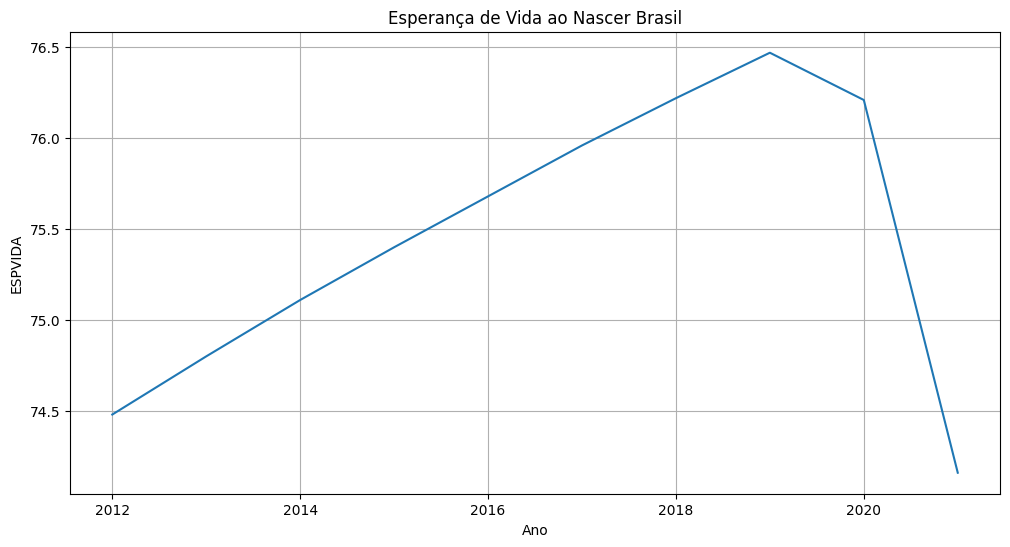

In [45]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

plt.plot(df_dim_soc_idh_BR['Ano'], df_dim_soc_idh_BR['ESPVIDA'])

# Adicionando título e rótulos aos eixos
plt.title('Esperança de Vida ao Nascer Brasil')
plt.xlabel('Ano')
plt.ylabel('ESPVIDA')
plt.grid(True)

plt.show()


## Gráficos do indicador - Média de anos de estudo (IDH)

In [46]:
df_dim_soc_idh_BR.head()

,AGREGACAO,IDHM,ESPVIDA,ANOSEST,Ano
0,BRASIL,0.746,74.48,8.56,2012
1,BRASIL,0.753,74.80,8.69,2013
2,BRASIL,0.762,75.11,8.88,2014
3,BRASIL,0.765,75.40,9.03,2015
4,BRASIL,0.771,75.68,9.13,2016


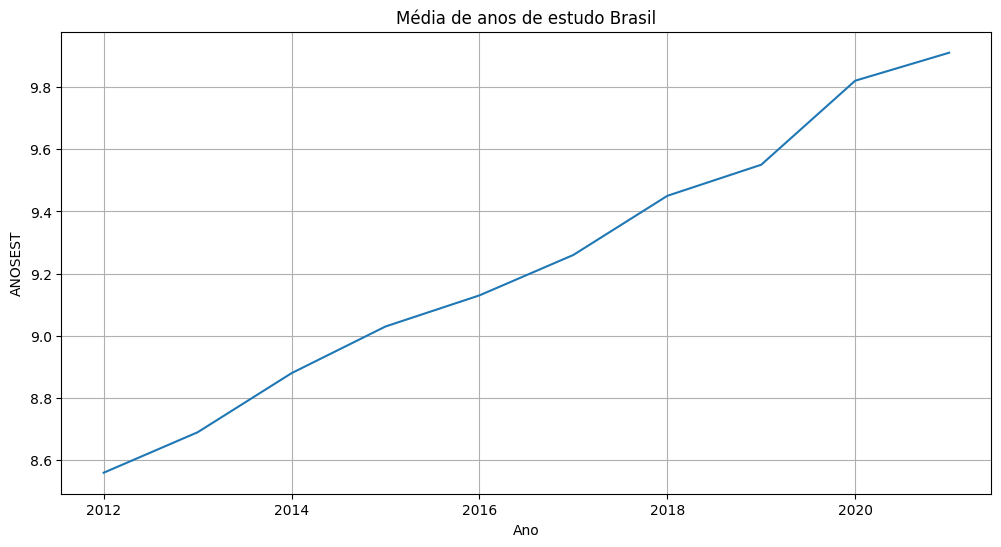

In [47]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

plt.plot(df_dim_soc_idh_BR['Ano'], df_dim_soc_idh_BR['ANOSEST'])

# Adicionando título e rótulos aos eixos
plt.title('Média de anos de estudo Brasil')
plt.xlabel('Ano')
plt.ylabel('ANOSEST')
plt.grid(True)

plt.show()


In [48]:
arquivo2 = "data_eurofound_BR"

caminho_completo2 = os.path.abspath(arquivo2)
print("O caminho completo para o arquivo é:", caminho_completo2)

O caminho completo para o arquivo é: D:\docs_mariana\ProjetosGit\Convergencia\data_eurofound_BR


In [49]:
#criando arquivo csv final
df_dim_soc_idh_BR.to_csv('D:\docs_mariana\ProjetosGit\Convergencia\data_eurofound_BR\df_dim_soc_idh_BR.csv', encoding='UTF-8')

# Indicadores do Censo

In [50]:
arquivo3 = "Expectativa de estudo.xlsx"

caminho_completo3 = os.path.abspath(arquivo3)
print("O caminho completo para o arquivo é:", caminho_completo3)

O caminho completo para o arquivo é: D:\docs_mariana\ProjetosGit\Convergencia\Expectativa de estudo.xlsx


In [51]:
exp_estudo_censo = pd.read_excel('D:\docs_mariana\ProjetosGit\Convergencia\Expectativa de estudo.xlsx')

In [55]:
exp_estudo_censo.head()

,Territorialidades,Expectativa de anos de estudo aos 18 anos de idade 1991,Expectativa de anos de estudo aos 18 anos de idade 2000,Expectativa de anos de estudo aos 18 anos de idade 2010
0,Brasil,8.16,8.76,9.54
1,Acre,6.56,6.77,8.69
2,Alagoas,6.62,6.54,9.07
3,Amapá,7.81,8.69,9.44
4,Amazonas,6.52,6.68,8.54


In [56]:
# Filtrar linhas onde a coluna 'Territorialidades' contenha 'Brasil'
exp_estudo_censo_BR = exp_estudo_censo[exp_estudo_censo['Territorialidades'] == 'Brasil']

In [57]:
exp_estudo_censo_BR.head()

,Territorialidades,Expectativa de anos de estudo aos 18 anos de idade 1991,Expectativa de anos de estudo aos 18 anos de idade 2000,Expectativa de anos de estudo aos 18 anos de idade 2010
0,Brasil,8.16,8.76,9.54


In [58]:
exp_estudo_censo_BR.columns

Index(['Territorialidades',
       'Expectativa de anos de estudo aos 18 anos de idade 1991',
       'Expectativa de anos de estudo aos 18 anos de idade 2000',
       'Expectativa de anos de estudo aos 18 anos de idade 2010'],
      dtype='object')

In [59]:
exp_estudo_censo_BR = exp_estudo_censo_BR.rename(columns={'Expectativa de anos de estudo aos 18 anos de idade 1991': 'Exp_anos_est_91',
       'Expectativa de anos de estudo aos 18 anos de idade 2000': 'Exp_anos_est_00',
       'Expectativa de anos de estudo aos 18 anos de idade 2010': 'Exp_anos_est_10'})

In [60]:
exp_estudo_censo_BR.head()

,Territorialidades,Exp_anos_est_91,Exp_anos_est_00,Exp_anos_est_10
0,Brasil,8.16,8.76,9.54


In [61]:
exp_estudo_censo_BR.columns

Index(['Territorialidades', 'Exp_anos_est_91', 'Exp_anos_est_00',
       'Exp_anos_est_10'],
      dtype='object')

In [62]:
exp_estudo_censo_BR = exp_estudo_censo_BR.rename(columns={'Exp_anos_est_91': '1991',
       'Exp_anos_est_00' : '2000', 'Exp_anos_est_10' : '2010'})

In [63]:
exp_estudo_censo_BR.tail()

,Territorialidades,1991,2000,2010
0,Brasil,8.16,8.76,9.54


In [64]:
exp_estudo_censo_BR = exp_estudo_censo_BR.melt(id_vars=['Territorialidades'], var_name='Ano', value_name='Expect_est')
exp_estudo_censo_BR.head()

,Territorialidades,Ano,Expect_est
0,Brasil,1991,8.16
1,Brasil,2000,8.76
2,Brasil,2010,9.54


In [65]:
exp_estudo_censo_BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Territorialidades  3 non-null      object
 1   Ano                3 non-null      object
 2   Expect_est         3 non-null      object
dtypes: object(3)
memory usage: 204.0+ bytes


In [66]:
exp_estudo_censo_BR.tail()

,Territorialidades,Ano,Expect_est
0,Brasil,1991,8.16
1,Brasil,2000,8.76
2,Brasil,2010,9.54


In [68]:
exp_estudo_censo_BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Territorialidades  3 non-null      object
 1   Ano                3 non-null      object
 2   Expect_est         3 non-null      object
dtypes: object(3)
memory usage: 204.0+ bytes


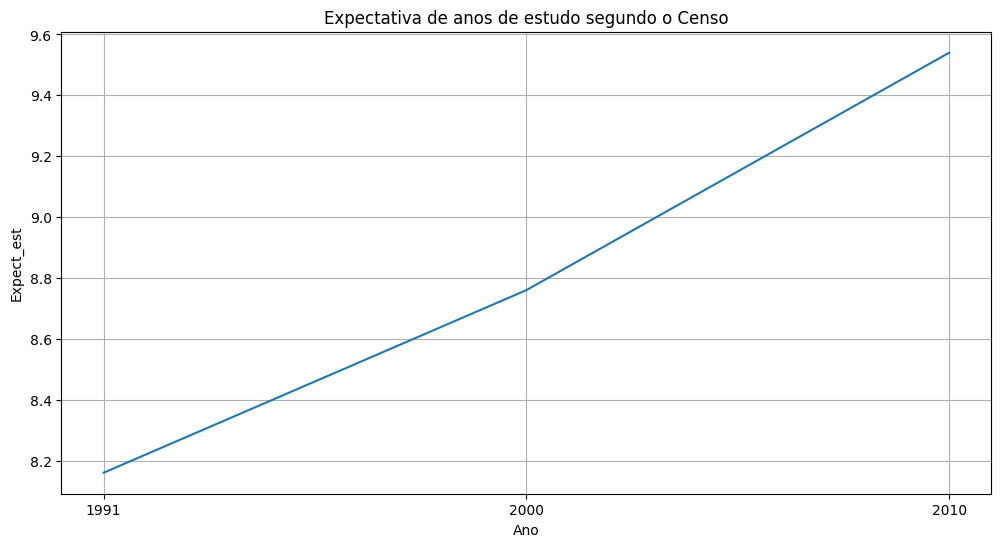

In [69]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

plt.plot(exp_estudo_censo_BR['Ano'], exp_estudo_censo_BR['Expect_est'])

# Adicionando título e rótulos aos eixos
plt.title('Expectativa de anos de estudo segundo o Censo')
plt.xlabel('Ano')
plt.ylabel('Expect_est')
plt.grid(True)

plt.show()


In [70]:
#criando arquivo csv final
exp_estudo_censo_BR.to_csv('D:\docs_mariana\ProjetosGit\Convergencia\data_eurofound_BR\exp_estudo_censo_BR.csv', encoding='UTF-8')